<b>Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [147]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\Logistic Regression\bank-full.csv',delimiter=';')

In [148]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [149]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [150]:
data.shape

(45211, 17)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [152]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [153]:
a = []
for i in data['y']:
    if i== 'yes':
        a.append(1)
    else:
        a.append(0)
a          

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [154]:
data['y'] = a

In [155]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


<Axes: xlabel='y', ylabel='count'>

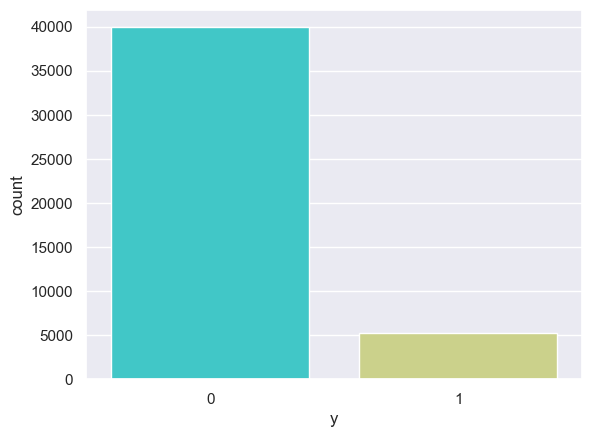

In [156]:
sns.countplot(x='y',data=data,palette='rainbow')

In [157]:
y_zero = len(data[data['y']==0])
y_one = len(data[data['y']==1])
print(y_zero,'\n',y_one)

39922 
 5289


In [158]:
print('Percentage of no subcription : ',y_zero/(y_zero+y_one)*100)
print('Percentage of subcription : ',y_one/(y_zero+y_one)*100)

Percentage of no subcription :  88.30151954170445
Percentage of subcription :  11.698480458295547


In [159]:
data.groupby(['y']).mean()

C:\Users\CSC\AppData\Local\Temp\ipykernel_13716\2450688737.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['y']).mean()


,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


<b> Average balance of Subcribers is higher than non-subscribers

In [160]:
data.groupby(['marital']).mean()

C:\Users\CSC\AppData\Local\Temp\ipykernel_13716\2545072708.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['marital']).mean()


,age,balance,day,duration,campaign,pdays,previous,y
marital,,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373,0.119455
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552,0.101235
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690,0.149492


In [161]:
data.groupby(['job']).mean()

C:\Users\CSC\AppData\Local\Temp\ipykernel_13716\425131258.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['job']).mean()


,age,balance,day,duration,campaign,pdays,previous,y
job,,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630,0.122027
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138,0.072750
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144,0.082717
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774,0.087903
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006,0.137556
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693,0.227915
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615,0.118429
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204,0.088830
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092,0.286780


In [162]:
data.groupby(['campaign']).mean()

C:\Users\CSC\AppData\Local\Temp\ipykernel_13716\4252226040.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['campaign']).mean()


,age,balance,day,duration,pdays,previous,y
campaign,,,,,,,
1,40.664786,1415.060648,14.745896,261.053637,49.478682,0.616393,0.145976
2,40.933627,1365.008397,15.528589,275.326030,40.177289,0.591843,0.112035
3,40.936425,1350.616374,16.106140,271.638834,37.409165,0.604963,0.111936
4,41.599659,1249.435548,16.956843,253.194492,27.529245,0.456275,0.090006
5,41.438209,1234.371882,16.803288,230.551020,33.198413,0.619048,0.078798
6,41.797057,1313.905500,17.727343,217.083656,28.243997,0.712626,0.071263
7,41.759184,1382.983673,17.691156,213.349660,30.702041,0.662585,0.063946
8,41.620370,1303.981481,18.498148,194.325926,23.901852,0.540741,0.059259
9,40.354740,1671.318043,19.039755,220.030581,17.651376,0.330275,0.064220


In [163]:
data.groupby(['education']).mean()

C:\Users\CSC\AppData\Local\Temp\ipykernel_13716\1917364240.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['education']).mean()


,age,balance,day,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272,0.086265
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753,0.105594
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980,0.150064
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422,0.135703


<b>People with tertiary education have higher mean of subcription that also corresponding with their higher mean balance

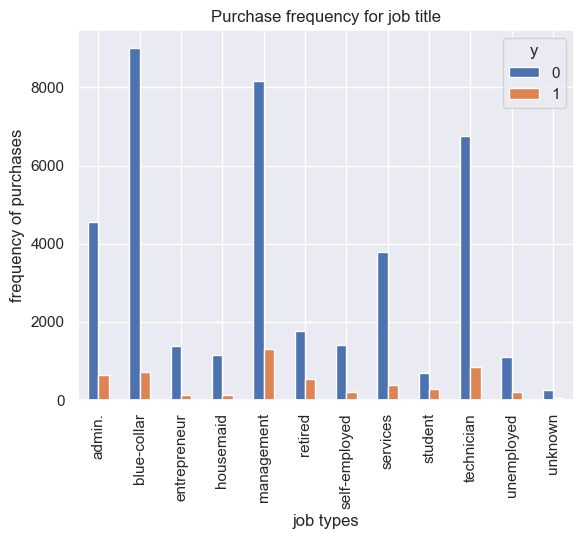

In [164]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase frequency for job title')
plt.xlabel('job types')
plt.ylabel('frequency of purchases')
plt.show()

Text(0, 0.5, 'Proportion of customers')

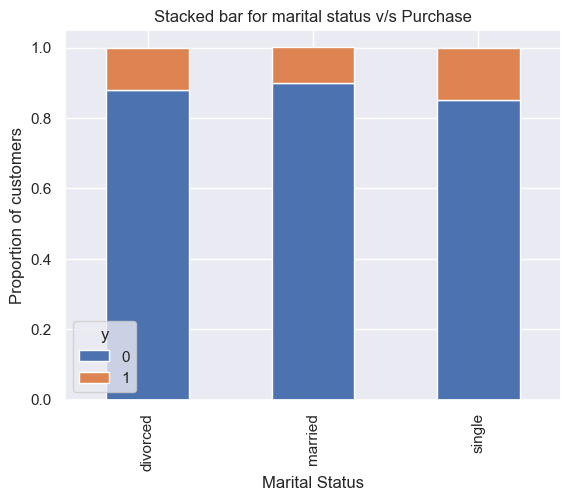

In [165]:
G2 = pd.crosstab(data.marital,data.y)
G2.div(G2.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked bar for marital status v/s Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of customers')

Text(0, 0.5, 'proportion of customers')

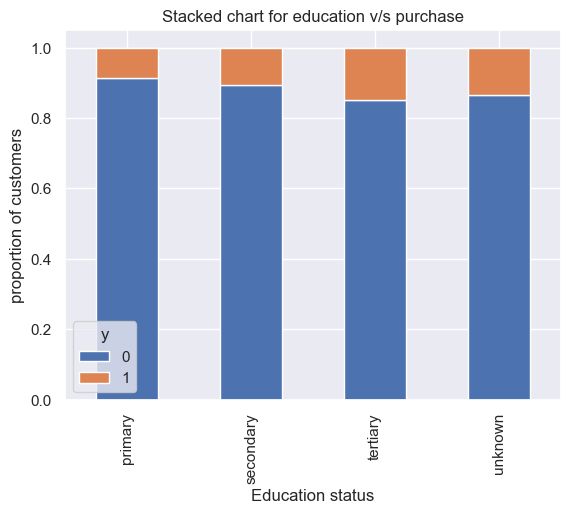

In [166]:
G3 = pd.crosstab(data.education,data.y)
G3 = G3.div(G3.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.title('Stacked chart for education v/s purchase')
plt.xlabel('Education status')
plt.ylabel('proportion of customers')

Text(0, 0.5, 'Purchase frequency')

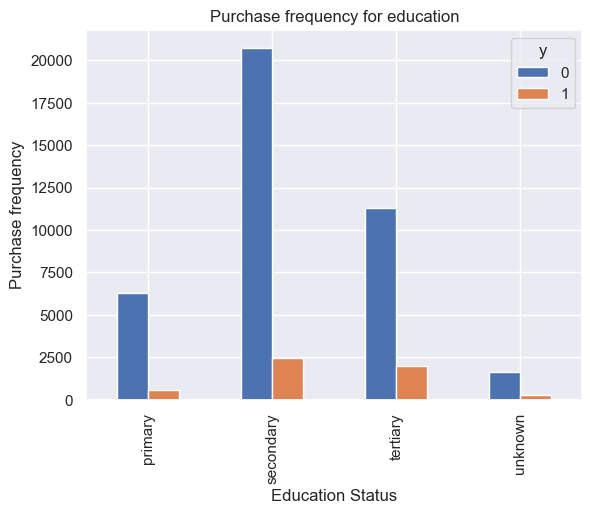

In [167]:
pd.crosstab(data.education,data.y).plot(kind="bar")
plt.title("Purchase frequency for education")
plt.xlabel('Education Status')
plt.ylabel('Purchase frequency')

Text(0, 0.5, 'Purchase frequency')

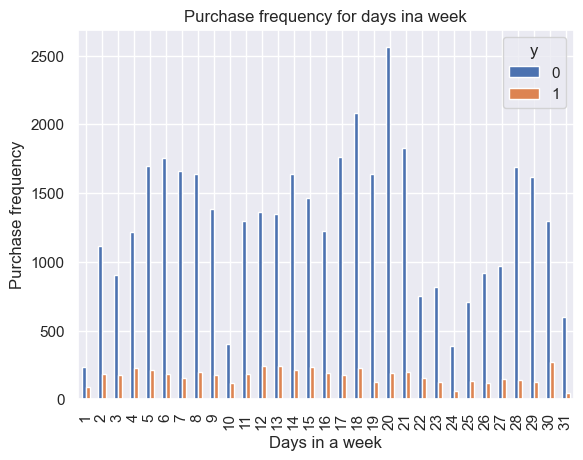

In [168]:
pd.crosstab(data.day,data.y).plot(kind="bar")
plt.title("Purchase frequency for days ina week")
plt.xlabel('Days in a week')
plt.ylabel('Purchase frequency')

Text(0, 0.5, 'Purchase frequency')

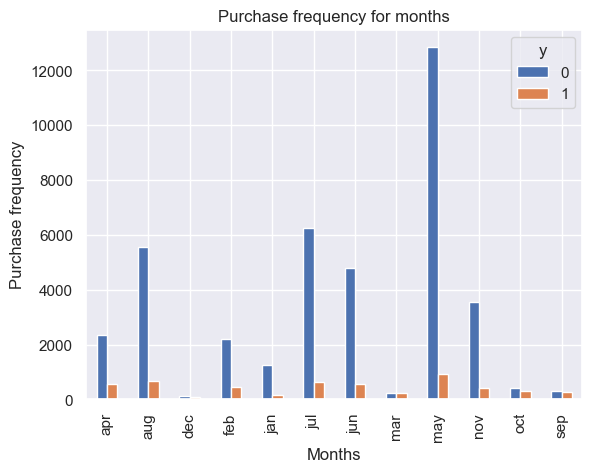

In [169]:
pd.crosstab(data.month,data.y).plot(kind="bar")
plt.title("Purchase frequency for months")
plt.xlabel('Months')
plt.ylabel('Purchase frequency')

C:\Users\CSC\AppData\Local\Temp\ipykernel_13716\4196427583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],bins=40)


Text(0.5, 1.0, 'Distribution of Age')

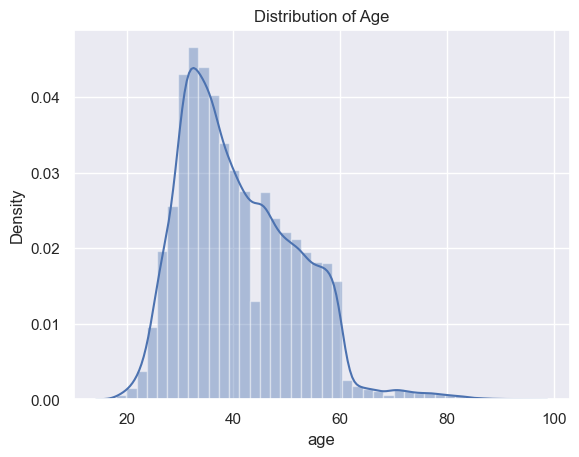

In [170]:
sns.distplot(data['age'],bins=40)
plt.title('Distribution of Age')

<Figure size 10000x5000 with 0 Axes>

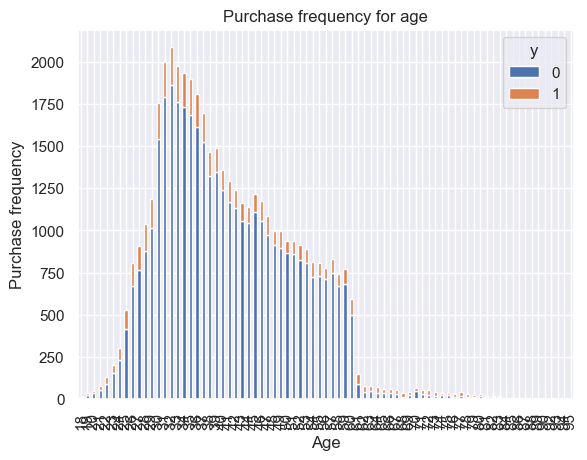

<Figure size 640x480 with 0 Axes>

In [171]:
plt.figure(figsize=(100,50))
pd.crosstab(data.age,data.y).plot(kind='bar',stacked=True)
plt.title('Purchase frequency for age')
plt.xlabel('Age')
plt.ylabel('Purchase frequency')
plt.show()
plt.savefig('Purchase frequency for age.jpg')

C:\Users\CSC\AppData\Local\Temp\ipykernel_13716\1968420682.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['balance'])


Text(0.5, 1.0, 'Distribution of balance')

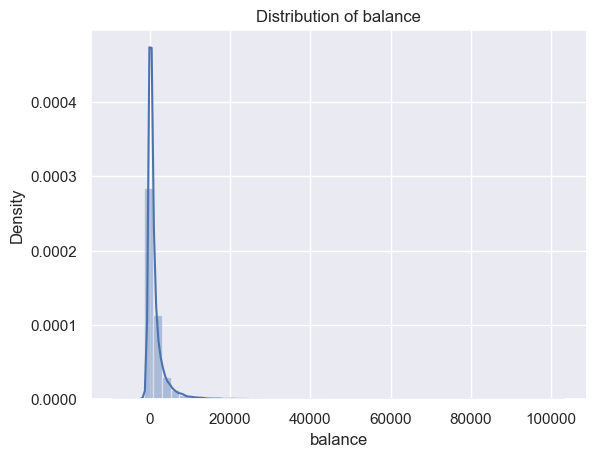

In [172]:
sns.distplot(data['balance'])
plt.title('Distribution of balance')

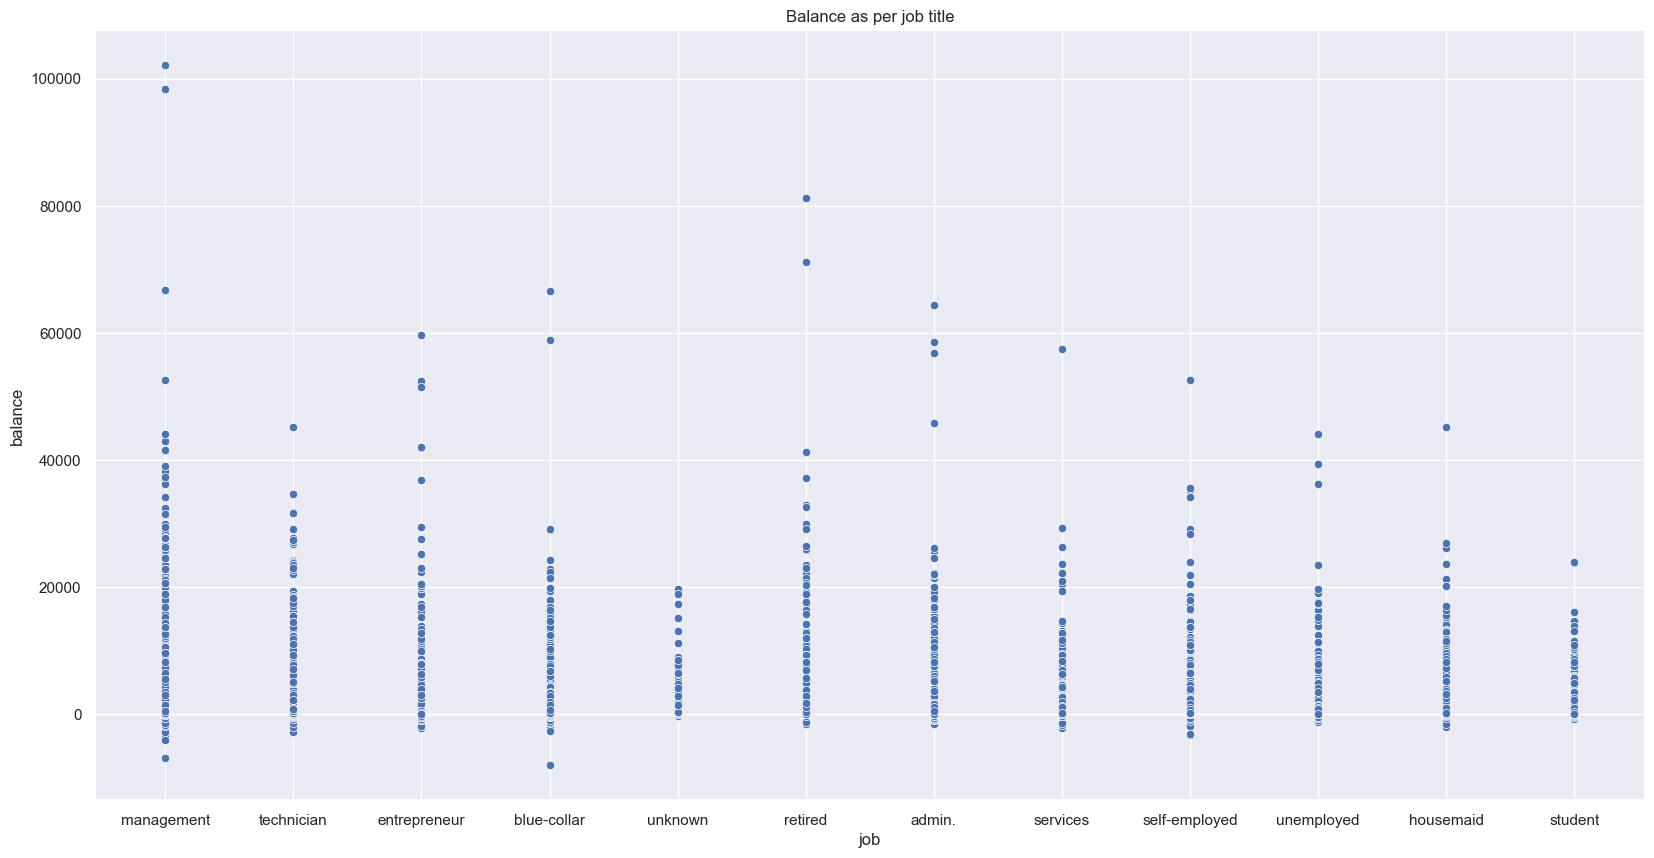

In [173]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=data['job'],y=data['balance'],data=data)
plt.title('Balance as per job title')
plt.show()

Text(0, 0.5, 'Purchase frequency')

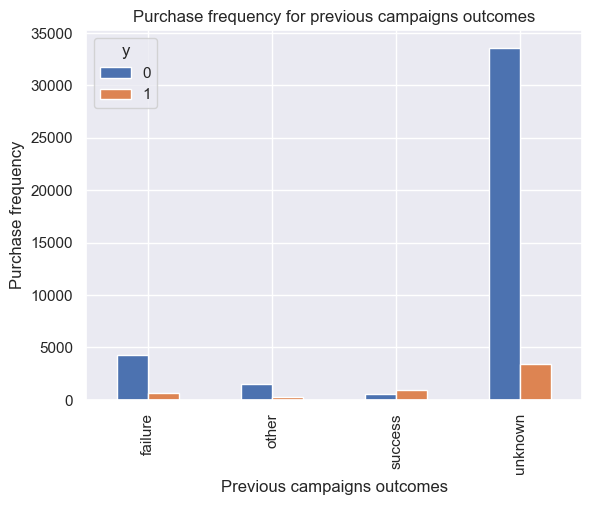

In [174]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title("Purchase frequency for previous campaigns outcomes")
plt.xlabel('Previous campaigns outcomes')
plt.ylabel('Purchase frequency')

<b>Let us covert all the categorical variable into numreriacl variables.

In [175]:
#applying dummy variables to all categorical variables

cat_var = data.select_dtypes(include=['object'])
cat_var

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [176]:
cat_dummy = pd.get_dummies(cat_var,drop_first=True)
cat_dummy

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
45207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [177]:
con_var = data.select_dtypes(include=['int'])
con_var

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1
45207,71,1729,17,456,2,-1,0,1
45208,72,5715,17,1127,5,184,3,1
45209,57,668,17,508,4,-1,0,0


In [178]:
data_final = pd.concat([con_var,cat_dummy],axis=1)
data_final

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


<b> X and Y

In [179]:
x = data_final.drop(['y'],axis=1)
y= data_final['y']
x

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [180]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

<b> Building the model without any data transformation

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [182]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [183]:
model_1 = LogisticRegression(solver='liblinear')

In [184]:
model_1.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [185]:
y_pred = model_1.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [186]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[7762,  182],
       [ 695,  404]], dtype=int64)

In [187]:
print('Accuracy = ',(7762+404)/(7762+182+404+695))

Accuracy =  0.9030189096538759


In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7944
           1       0.69      0.37      0.48      1099

    accuracy                           0.90      9043
   macro avg       0.80      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043



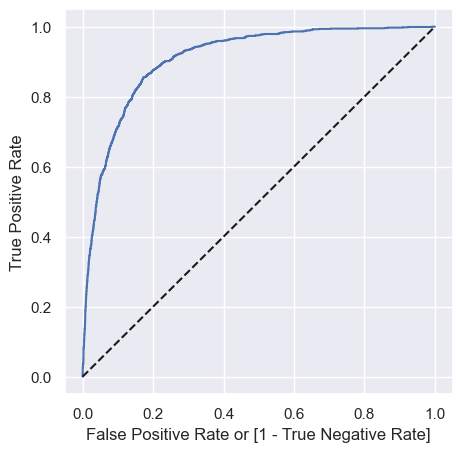

In [189]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,threshold = roc_curve(y_test,model_1.predict_proba(x_test)[:,1])
auc = roc_auc_score(y_test,y_pred)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='b')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [190]:
auc

0.6723482713846791

<b>Model_1 is good at predicting 0 but not 1 as the sample size for 0 are very high campared to 1.

-----------------------------------------------------------------------------------------------------------------------------------

<b>Building the model with resampling number of zeros

In [191]:
from sklearn.utils import resample

class_majority = data_final[data_final.y==0]
class_minority = data_final[data_final.y==1]

down_majority = resample(class_majority,replace=False,n_samples=len(class_minority),random_state=201)

In [192]:
data_resampled = pd.concat([class_minority,down_majority])
data_resampled.y.value_counts()

1    5289
0    5289
Name: y, dtype: int64

In [193]:
data_resampled

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
83,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
86,56,45,5,1467,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
87,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
129,55,2476,5,579,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
168,54,184,5,673,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11259,43,5233,18,108,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
41971,42,2463,26,183,2,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
23182,48,567,27,20,34,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21484,31,0,19,81,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [194]:
x_resampled = data_resampled.drop(['y'],axis=1)
y_resampled = data_resampled['y']

In [195]:
xA_train,xA_test,yA_train,yA_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=102)
model_2 = LogisticRegression(solver='liblinear')

In [196]:
model_2.fit(xA_train,yA_train)

LogisticRegression(solver='liblinear')

In [199]:
y_pred_2 = model_2.predict(xA_test)
y_pred_2

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [200]:
confusion_matrix(yA_test,y_pred_2)

array([[871, 180],
       [195, 870]], dtype=int64)

In [201]:
print(classification_report(yA_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1051
           1       0.83      0.82      0.82      1065

    accuracy                           0.82      2116
   macro avg       0.82      0.82      0.82      2116
weighted avg       0.82      0.82      0.82      2116



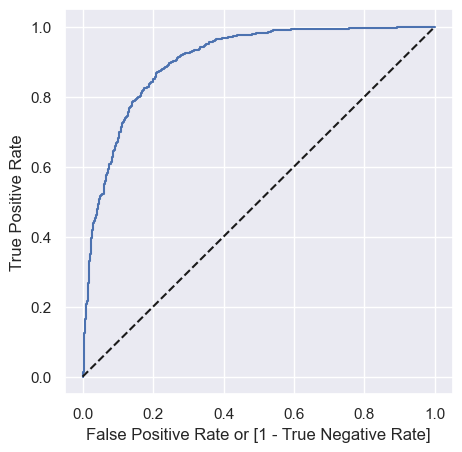

In [204]:
fpr,tpr,threshold = roc_curve(yA_test,model_2.predict_proba(xA_test)[:,1])
auc = roc_auc_score(yA_test,y_pred_2)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='b')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [205]:
auc

0.8228179734927166

<b>Model_2 has good predictivity for both 1 and 0 with good accuracy

-----------------------------------------------------------------------------------------------------------------------------------

<b>Let's also try SMOTE method

In [206]:
from imblearn.over_sampling import SMOTE

x1 = data_final.drop(['y'],axis=1)
y1 = data_final['y']

smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x1 , y1)

In [207]:
x_smote.shape

(79844, 42)

In [208]:
y_smote.shape

(79844,)

In [209]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x_smote,y_smote,test_size=.2,random_state=103)
model_3 = LogisticRegression(solver='liblinear')

In [210]:
model_3.fit(x1_train,y1_train)

LogisticRegression(solver='liblinear')

In [211]:
y_pred_3 = model_3.predict(x1_test)
y_pred_3

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [212]:
confusion_matrix(y1_test,y_pred_3)

array([[7476,  468],
       [ 707, 7318]], dtype=int64)

In [213]:
print(classification_report(y1_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      7944
           1       0.94      0.91      0.93      8025

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969



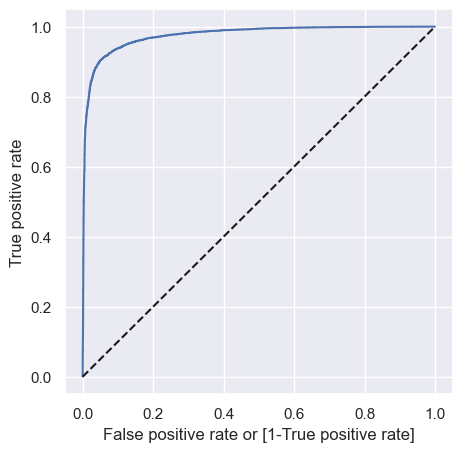

In [214]:
fpr,tpr,threshold = roc_curve(y1_test,model_3.predict_proba(x1_test)[:,1])
auc = roc_auc_score(y1_test,y_pred_3)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='b')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False positive rate or [1-True positive rate]")
plt.ylabel("True positive rate")
plt.show()

In [215]:
auc

0.9264939624097657

In [216]:
y_smote.value_counts()

0    39922
1    39922
Name: y, dtype: int64

<b>There is a drastic improvement in the accuracy of model_3 with SMOTE technique but overfitting can be a poroblem as our sample size for one's increased from 5300 to 40000 approximately. 

--------------------------------------------------------------------------------------------------------------------------------

<b>Conclusion

<b>Model_1 - Good at predicting 0's with good accuracy<br>
<b>Model_2 - Good at predicting both 0's and 1's with good accuracy<br>
<b>Model_3 - Good at predicting both 0's and 1's with improved accuracy and also outperforms model_2 in all the other metrics as well.<br>
    
<b>Result - Eventhough Model_3 is the better performer, Model_2 can be selected as the final model to avoid the problems of overfitting.